# Big Mart Sales Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
train = pd.read_csv("train.csv")


In [ ]:
test = pd.read_csv("/content/test (1).csv")

In [ ]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [ ]:
data.shape

(14204, 13)

In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#data cleaning


In [ ]:
#Check missing values:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [ ]:
data.duplicated

<bound method DataFrame.duplicated of       Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092            OUT049   
1                Soft Drinks   48.2692            OUT018   
2                       Meat  141.6180            OUT049   
3      Fruits and Vegetables  182.0950            OUT010   
4                  Household   53.8614            OUT013   
...                      ...       ...               ...   
14199            Snack Foods  141.3154            OUT046   
14200          Starchy Foods  169.1448            OUT018   
14201     Health and Hygiene  118.7440            OUT045   
14202                 Canned  214.6218            OUT017   
14203                 Canned   79.7960            OUT045   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                           1999      Medium               Tier 1   
1                           2009      Medium               Tier 3   
2                           1999      Medium               Tier 1   
3                           1998         NaN               Tier 3   
4                           1987        High               Tier 3   
...                          ...         ...                  ...   
14199                       1997       Small               Tier 1   
14200                       2009      Medium               Tier 3   
14201                       2002         NaN               Tier 2   
14202                       2007         NaN               Tier 2   
14203                       2002         NaN               Tier 2   

             Outlet_Type  Item_Outlet_Sales source  
0      Supermarket Type1          3735.1380  train  
1      Supermarket Type2           443.4228  train  
2      Supermarket Type1          2097.2700  train  
3          Grocery Store           732.3800  train  
4      Supermarket Type1           994.7052  train  
...                  ...                ...    ...  
14199  Supermarket Type1                NaN   test  
14200  Supermarket Type2                NaN   test  
14201  Supermarket Type1                NaN   test  
14202  Supermarket Type1                NaN   test  
14203  Supermarket Type1                NaN   test  

[14204 rows x 13 columns]>

In [ ]:
data.drop_duplicates(keep='first', inplace=True)

In [ ]:
#Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              10201
Non-Consumable     2686
Drinks             1317
Name: count, dtype: int64

In [ ]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
Item_Type_Combined            object
dtype: object

##checking Outliers

In [ ]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)  # First quartile (25th percentile)
    Q3 = np.percentile(data, 75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Compute lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers based on the bounds
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers


Label encoding and One Hot enncoding


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()



In [ ]:
#One Hot Coding:

data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_LF,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,False,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,False,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,False,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,False,...,True,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Specify the column(s) you want to scale
columns_to_scale = ['Item_MRP','Item_Outlet_Sales',]

# Fit the scaler to the specified column(s) and transform the data
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


In [ ]:
data['Item_Identifier'].values

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCO17', 'FDJ26', 'FDU37'],
      dtype=object)

In [ ]:
data.drop('Item_Identifier',axis =1,inplace = True)

In [ ]:
data.dtypes

Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Item_Fat_Content_LF                     bool
Item_Fat_Content_Low Fat                bool
Item_Fat_Content_Regular                bool
Item_Fat_Content_low fat                bool
Item_Fat_Content_reg                    bool
Outlet_Location_Type_Tier 1             bool
Outlet_Location_Type_Tier 2             bool
Outlet_Location_Type_Tier 3             bool
Outlet_Size_High                        bool
Outlet_Size_Medium                      bool
Outlet_Size_Small                       bool
Outlet_Type_Grocery Store               bool
Outlet_Type_Supermarket Type1           bool
Outlet_Type_Supermarket Type2           bool
Outlet_Typ

#exportng data


In [ ]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [ ]:
data.apply(lambda x: sum(x.isnull()))

Item_Weight                          2439
Item_Visibility                         0
Item_MRP                                0
Outlet_Identifier                       0
Item_Outlet_Sales                    5681
source                                  0
Item_Fat_Content_LF                     0
Item_Fat_Content_Low Fat                0
Item_Fat_Content_Regular                0
Item_Fat_Content_low fat                0
Item_Fat_Content_reg                    0
Outlet_Location_Type_Tier 1             0
Outlet_Location_Type_Tier 2             0
Outlet_Location_Type_Tier 3             0
Outlet_Size_High                        0
Outlet_Size_Medium                      0
Outlet_Size_Small                       0
Outlet_Type_Grocery Store               0
Outlet_Type_Supermarket Type1           0
Outlet_Type_Supermarket Type2           0
Outlet_Type_Supermarket Type3           0
Item_Type_Combined_Drinks               0
Item_Type_Combined_Food                 0
Item_Type_Combined_Non-Consumable 

In [ ]:
#data_filled = data.fillna(data.mean())

In [ ]:
data.apply(lambda x: sum(x.isnull()))

Item_Weight                          2439
Item_Visibility                         0
Item_MRP                                0
Outlet_Identifier                       0
Item_Outlet_Sales                    5681
source                                  0
Item_Fat_Content_LF                     0
Item_Fat_Content_Low Fat                0
Item_Fat_Content_Regular                0
Item_Fat_Content_low fat                0
Item_Fat_Content_reg                    0
Outlet_Location_Type_Tier 1             0
Outlet_Location_Type_Tier 2             0
Outlet_Location_Type_Tier 3             0
Outlet_Size_High                        0
Outlet_Size_Medium                      0
Outlet_Size_Small                       0
Outlet_Type_Grocery Store               0
Outlet_Type_Supermarket Type1           0
Outlet_Type_Supermarket Type2           0
Outlet_Type_Supermarket Type3           0
Item_Type_Combined_Drinks               0
Item_Type_Combined_Food                 0
Item_Type_Combined_Non-Consumable 

In [ ]:
#to calculate the percentage of the values missing
per = data.isnull().sum() * 100/len(data)
print(per)


Item_Weight                          17.171219
Item_Visibility                       0.000000
Item_MRP                              0.000000
Outlet_Identifier                     0.000000
Item_Outlet_Sales                    39.995776
source                                0.000000
Item_Fat_Content_LF                   0.000000
Item_Fat_Content_Low Fat              0.000000
Item_Fat_Content_Regular              0.000000
Item_Fat_Content_low fat              0.000000
Item_Fat_Content_reg                  0.000000
Outlet_Location_Type_Tier 1           0.000000
Outlet_Location_Type_Tier 2           0.000000
Outlet_Location_Type_Tier 3           0.000000
Outlet_Size_High                      0.000000
Outlet_Size_Medium                    0.000000
Outlet_Size_Small                     0.000000
Outlet_Type_Grocery Store             0.000000
Outlet_Type_Supermarket Type1         0.000000
Outlet_Type_Supermarket Type2         0.000000
Outlet_Type_Supermarket Type3         0.000000
Item_Type_Com

In [ ]:
data["Item_Weight_mean"] =data["Item_Weight"].fillna(data["Item_Weight"].mean())

data["Item_Weight_median"] =data["Item_Weight"].fillna(data["Item_Weight"].median())

In [ ]:
#checking variance before and after inputing the mean and median
# the variance should always be close with the original variance of the dataset

print("original weight variance", data["Item_Weight"].var())
print("mean weight  variance", data["Item_Weight_mean"].var())
print("median weight variance", data["Item_Weight_median"].var())

original weight variance 21.64577752507669
mean weight  variance 17.92867188657341
median weight variance 17.93396207709429


From our result the variance are close which is good so we will plot a graph to know if the original graph of the dataset will also be close with the graph we will get after filling the missing value with mean or median.

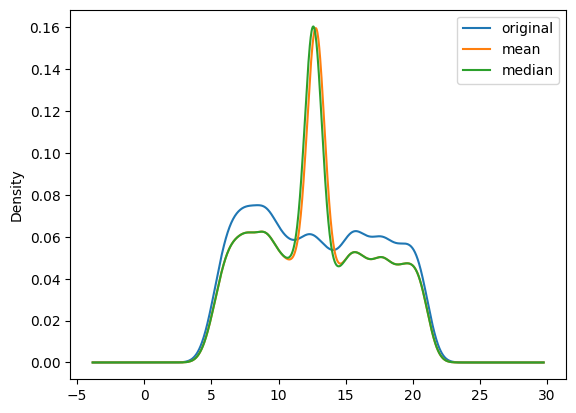

In [ ]:
data["Item_Weight"].plot(kind="kde", label = "original")

data["Item_Weight_mean"].plot(kind="kde", label = "mean")
data["Item_Weight_median"].plot(kind="kde", label = "median")

plt.legend()
plt.show()

From the plot above, it is very clear that filling with mean or median will alter our original dataset since most of the dataset were clustered in the middle due to the mean or median used.

In [ ]:
#We will try another method in filling the missing values.
#checking if linear interpolation can be used to fill the missing values
#USING LINEAR INTERPOLATION#
data["Item_Weight_interpolate"] =data["Item_Weight"].interpolate(method = "linear")

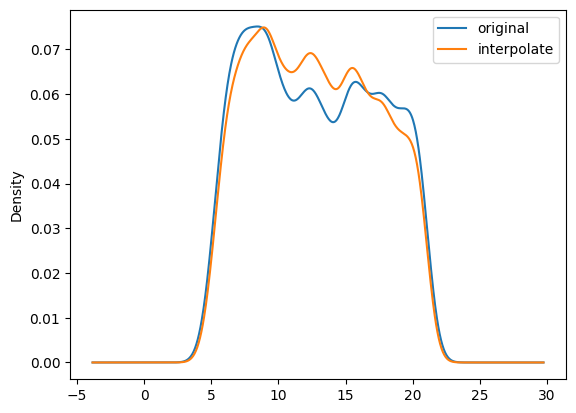

In [ ]:
#We will also plot a graph to know if the original dataset distribution is close with interpolation method.
data["Item_Weight"].plot(kind="kde", label = "original")

data["Item_Weight_interpolate"].plot(kind="kde", label = "interpolate")


plt.legend()
plt.show()

From the plots the distribution are close and better than the mean and median.

We will also try another method from the bivariate method to know if we can use it to fill the missing values

In [ ]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors = 10, weights ="distance")

data["knn_imputer"] = knn.fit_transform(data[["Item_Weight"]]).ravel()

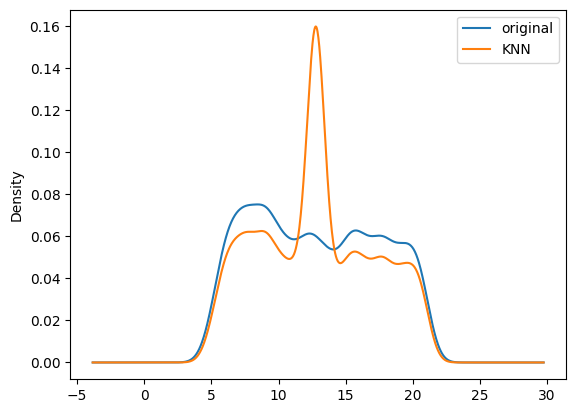

In [ ]:
#comparing the k-nearest neighbors method with the original dataset using graph
data["Item_Weight"].plot(kind="kde", label = "original")

data["knn_imputer"] .plot(kind="kde", label = "KNN")


plt.legend()
plt.show()

From the dataset above, the datasets where clustered in the middle. so from all the method used, the linear interpolation method is the best filling method to use in this instance.

In [ ]:
#replacing the missing values
#using linear interpolation to replace the values in "item weight"
data["Item_Weight"].fillna(data["Item_Weight"].interpolate(method = "linear"), inplace = True)

In [ ]:
# Check for null values in the 'Item_Outlet_Sales' column
null_values = data['Item_Outlet_Sales'].isnull().sum()
print("Number of null values in 'Item_Outlet_Sales' column before cleaning:", null_values)
def replace_null_with_median(data, column):
    median = data[column].median()  # Calculate median of the column
    data[column].fillna(median, inplace=True)  # Replace null values with median
    return data

# Call the function to replace null values in 'Item_Outlet_Sales' column with median
data_cleaned = replace_null_with_median(data, 'Item_Outlet_Sales')


Number of null values in 'Item_Outlet_Sales' column before cleaning: 5681


In [ ]:
data.apply(lambda x: sum(x.isnull()))

Item_Weight                          0
Item_Visibility                      0
Item_MRP                             0
Outlet_Identifier                    0
Item_Outlet_Sales                    0
source                               0
Item_Fat_Content_LF                  0
Item_Fat_Content_Low Fat             0
Item_Fat_Content_Regular             0
Item_Fat_Content_low fat             0
Item_Fat_Content_reg                 0
Outlet_Location_Type_Tier 1          0
Outlet_Location_Type_Tier 2          0
Outlet_Location_Type_Tier 3          0
Outlet_Size_High                     0
Outlet_Size_Medium                   0
Outlet_Size_Small                    0
Outlet_Type_Grocery Store            0
Outlet_Type_Supermarket Type1        0
Outlet_Type_Supermarket Type2        0
Outlet_Type_Supermarket Type3        0
Item_Type_Combined_Drinks            0
Item_Type_Combined_Food              0
Item_Type_Combined_Non-Consumable    0
Outlet_0                             0
Outlet_1                 

In [ ]:
# Remove missing values by mode for 'Item_Weight'
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mode()[0])

# Calculate correlation between 'Item_Outlet_Sales' and 'Item_Weight'
correlation_with_sales = data['Item_Outlet_Sales'].corr(data['Item_Weight'])
print("Correlation with Item_Weight:", correlation_with_sales)


Correlation with Item_Weight: 0.013219723329174364


In [ ]:
constant_value = -1
data_filled = data.fillna(constant_value)

Non-numeric columns: Index(['Outlet_Identifier', 'source', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Combined_Drinks',
       'Item_Type_Combined_Food', 'Item_Type_Combined_Non-Consumable',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')


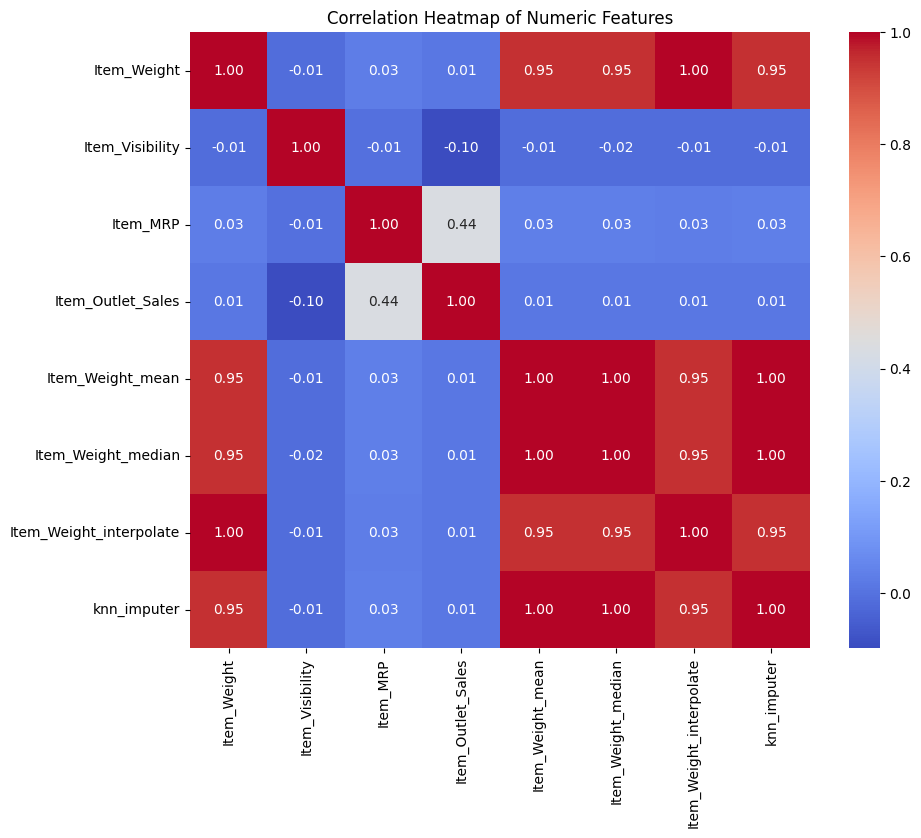

In [ ]:
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)
data_numeric = data.drop(non_numeric_cols, axis=1)

# Visualize the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Item_Outlet_Sales', 'source', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Combined_Drinks',
       'Item_Type_Combined_Food', 'Item_Type_Combined_Non-Consumable',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9', 'Item_Weight_mean',
       'Item_Weight_median', 'Item_Weight_interpolate', 'knn_imputer'],
      dtype='object')

In [ ]:
#mode_of_Item_Outlet_Sales = data.pivot_table(values='Item_Outlet_Sales', columns='Item_MRP', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
data.apply(lambda x: sum(x.isnull()))

Item_Weight                          0
Item_Visibility                      0
Item_MRP                             0
Outlet_Identifier                    0
Item_Outlet_Sales                    0
source                               0
Item_Fat_Content_LF                  0
Item_Fat_Content_Low Fat             0
Item_Fat_Content_Regular             0
Item_Fat_Content_low fat             0
Item_Fat_Content_reg                 0
Outlet_Location_Type_Tier 1          0
Outlet_Location_Type_Tier 2          0
Outlet_Location_Type_Tier 3          0
Outlet_Size_High                     0
Outlet_Size_Medium                   0
Outlet_Size_Small                    0
Outlet_Type_Grocery Store            0
Outlet_Type_Supermarket Type1        0
Outlet_Type_Supermarket Type2        0
Outlet_Type_Supermarket Type3        0
Item_Type_Combined_Drinks            0
Item_Type_Combined_Food              0
Item_Type_Combined_Non-Consumable    0
Outlet_0                             0
Outlet_1                 

#now we will visualize it

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

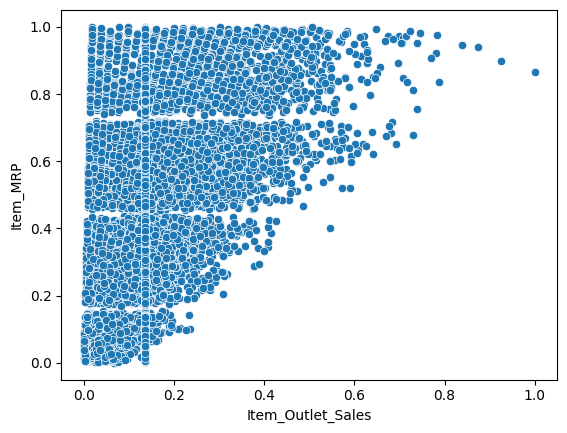

In [ ]:
sns.scatterplot(x = data['Item_Outlet_Sales'],y=data['Item_MRP'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

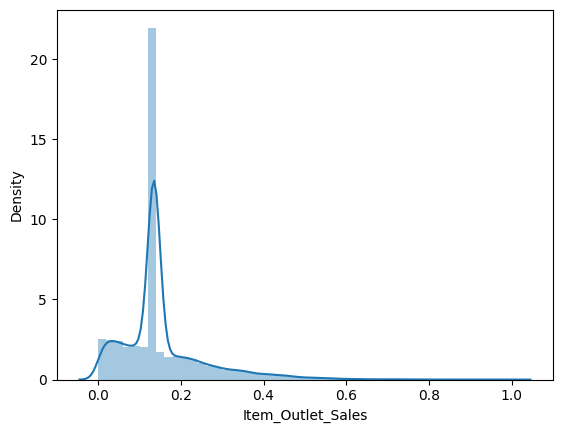

In [ ]:
sns.distplot(a = data['Item_Outlet_Sales'])

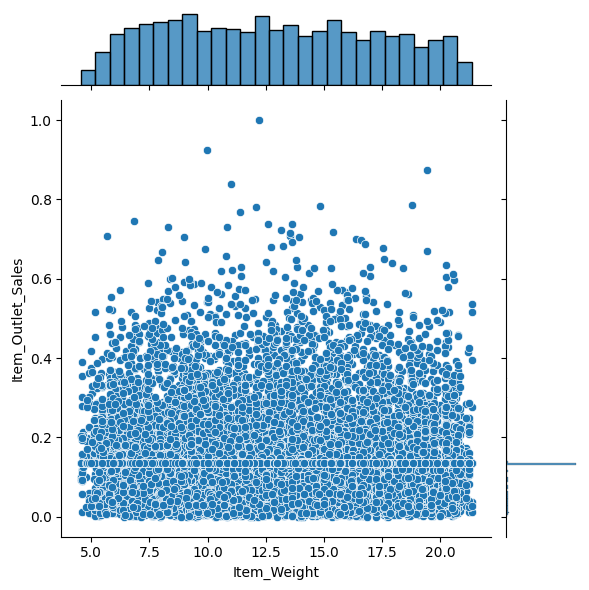

In [ ]:
#A simple joint plot to visualize item MRP and outlet sales
sns.jointplot(x = data['Item_Weight'],y = data['Item_Outlet_Sales'])

In [ ]:
#sns.barplot(x = data['Item_Type_Combined'],y = data['Item_Outlet_Sales'])

In [ ]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,...,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Item_Weight_mean,Item_Weight_median,Item_Weight_interpolate,knn_imputer
0,9.30,0.016047,0.927507,OUT049,0.283587,train,False,True,False,False,...,False,False,False,False,False,True,9.30,9.30,9.30,9.30
1,5.92,0.019278,0.072068,OUT018,0.031419,train,False,False,True,False,...,False,False,False,False,False,False,5.92,5.92,5.92,5.92
2,17.50,0.016760,0.468288,OUT049,0.158115,train,False,True,False,False,...,False,False,False,False,False,True,17.50,17.50,17.50,17.50
3,19.20,0.000000,0.640093,OUT010,0.053555,train,False,False,True,False,...,False,False,False,False,False,False,19.20,19.20,19.20,19.20
4,8.93,0.000000,0.095805,OUT013,0.073651,train,False,True,False,False,...,False,False,False,False,False,False,8.93,8.93,8.93,8.93


##Model Building


In [ ]:

# Reading modified data
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [ ]:
train2.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,0.927507,OUT049,0.283587,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,5.92,0.019278,0.072068,OUT018,0.031419,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,17.50,0.016760,0.468288,OUT049,0.158115,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,19.20,0.000000,0.640093,OUT010,0.053555,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,8.93,0.000000,0.095805,OUT013,0.073651,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales

In [ ]:
X_test = test2.drop(['Outlet_Identifier'], axis=1)

In [ ]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,0.927507,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,5.92,0.019278,0.072068,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,17.50,0.016760,0.468288,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,19.20,0.000000,0.640093,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,8.93,0.000000,0.095805,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
y_train.head()

0    0.283587
1    0.031419
2    0.158115
3    0.053555
4    0.073651
Name: Item_Outlet_Sales, dtype: float64

##Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Assuming you have X_train, X_test, y_train, and y_test already defined

# Create an imputer with a strategy to fill missing values with the mean
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Instantiate and fit the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train_imputed, y_train)

# Predict the target variable for the test set
y_pred = regressor.predict(X_test_imputed)


In [ ]:
y_pred


array([0.13906016, 0.11027751, 0.14113749, ..., 0.13604583, 0.27060384,
       0.09454592])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Assuming you have X_train and y_train already defined

# Create an imputer with a strategy to fill missing values with the mean
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Instantiate and fit the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train_imputed, y_train)

# Calculate the accuracy of the model
lr_accuracy = round(regressor.score(X_train_imputed, y_train) * 100, 2)
lr_accuracy

56.36

##Random Forest Regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Assuming you have X_train and y_train already defined

# Create an imputer with a strategy to fill missing values with the mean
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Instantiate and fit the RandomForestRegressor model
regressor = RandomForestRegressor(n_estimators=100, max_depth=6, min_samples_leaf=50, n_jobs=4)
regressor.fit(X_train_imputed, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [ ]:
# Assuming you have already defined X_test
from sklearn.impute import SimpleImputer

# Create an imputer with a strategy to fill missing values with the mean
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the testing data using the fitted imputer
X_test_imputed = imputer.transform(X_test)

# Predict the target variable for the test set
y_pred = regressor.predict(X_test_imputed)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Assuming you have X_train and y_train already defined

# Create an imputer with a strategy to fill missing values with the mean
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Instantiate and fit the RandomForestRegressor model
regressor = RandomForestRegressor(n_estimators=100, max_depth=6, min_samples_leaf=50, n_jobs=4)
regressor.fit(X_train_imputed, y_train)

# Calculate the accuracy of the model
rf_accuracy = round(regressor.score(X_train_imputed, y_train), 2)
rf_accuracy


0.61

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train AdaBoost classifier
adaboost_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = adaboost_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.87


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train AdaBoost classifier
adaboost_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = adaboost_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform cross-validation
cv_score = cross_val_score(adaboost_clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_score.mean())


Accuracy: 0.87
Cross-Validation Accuracy: 0.865


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming regressor, X_train, and y_train are already defined

# Perform cross-validation using neg_mean_squared_error as the scoring metric
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared error scores to positive values (by negating them)
mse_scores = -cv_scores

print("Mean Squared Error Scores:", mse_scores)

Mean Squared Error Scores: [0.11547924 0.076481   0.09132491 0.10261868 0.07142398]


In [ ]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data into DMatrix format (optimized data structure for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'seed': 42
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
y_pred = xgb_model.predict(dtest)

# Convert probability predictions to binary predictions
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)


Accuracy: 0.895


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Assuming you have X_train and y_train already defined

# Define the pipeline with an imputer and a RandomForestRegressor
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', RandomForestRegressor())
])

# Define the hyperparameters grid to search
param_grid = {
    'regressor__n_estimators': [100],
    'regressor__max_depth': [10],
    'regressor__min_samples_leaf': [5]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
best_model_score = best_model.score(X_test, y_test)
print("Best model score:", best_model_score)


Best hyperparameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 5, 'regressor__n_estimators': 100}
Best model score: 0.6446498050649614


In [ ]:
import xgboost as xgb
import pickle
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

# Export the trained model using pickle
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_clf, f)
